<a href="https://colab.research.google.com/github/seanigens/IntroDataViz/blob/main/S544_Practice_Activity_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [16]:
## library imports here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [5]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


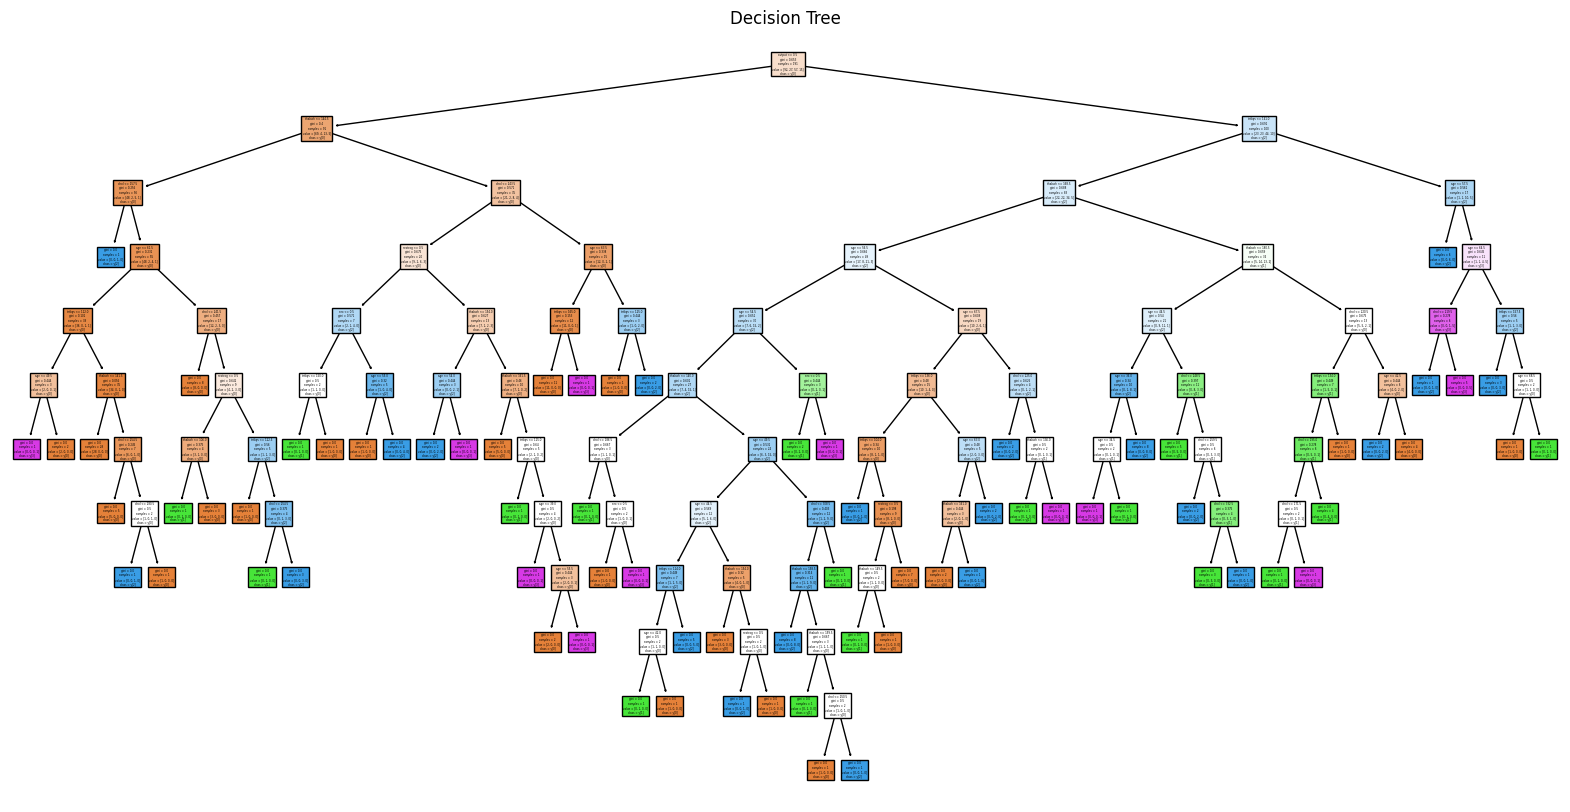

(0.36585365853658536, 0.4268292682926829, 0.5121951219512195)

In [9]:
X = ha.drop('cp', axis=1)
y = ha['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
lda = LinearDiscriminantAnalysis()
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
lda.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_lda = lda.predict(X_test)
knn1 = accuracy_score(y_test, y_pred_knn)
dt1 = accuracy_score(y_test, y_pred_dt)
lda1 = accuracy_score(y_test, y_pred_lda)

plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=True)
plt.title('Decision Tree')
plt.show()
knn1, dt1, lda1

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [15]:
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)

def lr1(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return f1_score(y_test, y_pred)

f1_scores = {}
for cp_type in ['cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3']:
    y = ha[cp_type]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    f1_scores[cp_type] = lr1(X_train, X_test, y_train, y_test)
f1_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'cp_is_0': 0.7027027027027027,
 'cp_is_1': 0.0,
 'cp_is_2': 0.13793103448275862,
 'cp_is_3': 0.0}

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [18]:
ha1 = ha[ha['cp'].isin([0, 1])]
X1 = ha1.drop('cp', axis=1)
y1 = ha1['cp']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores = {'0 vs 1': roc_auc}

for cp_type in [2, 3]:
    subset = ha[ha['cp'].isin([0, cp_type])]
    X_subset = subset.drop('cp', axis=1)
    y_subset = subset['cp']

    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_test)[:, 1]
    roc_auc_scores[f'0 vs {cp_type}'] = roc_auc_score(y_test, y_pred)

roc_auc_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'0 vs 1': 1.0, '0 vs 2': 1.0, '0 vs 3': 1.0}